# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

In [2]:
# Disable warnings for more clear output
import warnings 
warnings.filterwarnings('ignore')

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [3]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = len(newsgroups_test.target)
test_data = newsgroups_test.data[int(num_test)//2:]
test_labels = newsgroups_test.target[num_test//2:]
dev_data = newsgroups_test.data[:num_test//2]
dev_labels = newsgroups_test.target[:num_test//2]
train_data = newsgroups_train.data
train_labels = newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


(1) For each of the first 5 training examples, print the text of the message along with the label.

In [5]:
pretty_categories = ['Atheism', 'Graphics', 'Space', 'Religion']

def P1(num_examples=5):

### STUDENT START ###
    
    for i in range(num_examples):
        print(' ---> Example #{}\n\n  - {} -'.format(i+1, pretty_categories[train_labels[i]]))
        print('   ', '='*len(pretty_categories[train_labels[i]]))
        print(train_data[i], '\n')
    
### STUDENT END ###

P1()

 ---> Example #1

  - Graphics -
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych 

 ---> Example #2

  - Religion -


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil corruption
for cent

(2) Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [7]:
def P2():
    
### STUDENT START ###

# Part a

    vectorizer = CountVectorizer()
    # Fit and transform with training data
    doc_matrix = vectorizer.fit_transform(train_data)
    print ("Part a:")
    print ("Size of Vocabulary: {}.".format(doc_matrix.shape[1]))
    # Average number of nonzero features per sample (get number of nonzero entries per example, then average)
    print ("Average Number of Nonzero Features: {:.2f}.".format(np.mean(doc_matrix.getnnz(axis=1))))
    # What fraction of the entries are non-zero?
    print ("Fraction of Nonzero Features {:.5f}.".format(1.0*doc_matrix.nnz/(doc_matrix.shape[0]*doc_matrix.shape[1])))

# Part b

    print ("Part b:")
    print ("Feature 1: {}.".format(vectorizer.get_feature_names()[0]))
    print ("Feature 2: {}.".format(vectorizer.get_feature_names()[-1]))

# Part c
    vocab = ["atheism", "graphics", "space", "religion"]
    vectorizer = CountVectorizer(vocabulary=vocab)
    doc_matrix = vectorizer.fit_transform(train_data)
    print ("Part c:")
    print ("Shape of Training Data: {}.".format(doc_matrix.shape))
    print ("Average Number of Nonzero Vecotres: {:.2f}.".format(np.mean(doc_matrix.getnnz(axis=1))))
    
# Part d
    vectorizer = CountVectorizer(ngram_range=(2,3), analyzer="char")
    doc_matrix = vectorizer.fit_transform(train_data)
    print ("Part d:")
    print ("Vocabulary Size: {}.".format(doc_matrix.shape[1]))
    
# Part e: mininum document frequency of 10
    vectorizer = CountVectorizer(min_df=10)
    doc_matrix = vectorizer.fit_transform(train_data)
    print ("Part e:")
    print ("Vocabulary Size: {}.".format(doc_matrix.shape[1]))

# Part f
    # Train data vocab
    vectorizer_train = CountVectorizer()
    vectorizer_train.fit(train_data)
    features_train = vectorizer_train.get_feature_names()
    # Dev data vocab
    vectorizer_dev = CountVectorizer()
    vectorizer_dev.fit(dev_data)
    features_dev = vectorizer_dev.get_feature_names()
    # Intersection of sets
    common_words = set(features_dev) & set(features_train)
    print ("Part f:")
    print ("Words Present in Training and not in Dev / Total Words {:.3f}.".format(1.0 - 1.0*len(common_words)/len(features_dev)))
    
### STUDENT END ###
P2()

Part a:
Size of Vocabulary: 26879.
Average Number of Nonzero Features: 96.71.
Fraction of Nonzero Features 0.00360.
Part b:
Feature 1: 00.
Feature 2: zyxel.
Part c:
Shape of Training Data: (2034, 4).
Average Number of Nonzero Vecotres: 0.27.
Part d:
Vocabulary Size: 35478.
Part e:
Vocabulary Size: 3064.
Part f:
Words Present in Training and not in Dev / Total Words 0.248.


(3) Use the default CountVectorizer options and report the f1 score (use metrics.f1_score) for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

a. Why doesn't nearest neighbors work well for this problem?

b. Any ideas why logistic regression doesn't work as well as Naive Bayes?

c. Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

In [8]:
def P3():
    
### STUDENT START ###



    vectorizer = CountVectorizer()
    # Fit and transform with training data
    doc_matrix_train = vectorizer.fit_transform(train_data)
    doc_matrix_dev = vectorizer.transform(dev_data)

# kNN

    # Find optimal k first, with the default accuracy scoring option
    ks = {'n_neighbors':[a for a in range(1,101)]}
    knn_grid = GridSearchCV(KNeighborsClassifier(), ks)
    knn_grid.fit(doc_matrix_train, train_labels)
    print ("kNN Model:")
    print ("Optimal k: {}.".format(knn_grid.best_params_['n_neighbors']))
    print ("Accuracy at Optimal k: {:.3f}.".format(knn_grid.best_score_))
    # Compute macro f1 score on the dev data
    knn_f1score = metrics.f1_score(dev_labels, knn_grid.predict(doc_matrix_dev), average="macro")
    print ("f1 score: {:.3f}.".format(knn_f1score))

# NB model
    # Find optimal alpha first, with the default accuracy scoring option
    alphas = {"alpha": [a/100. for a in range(1, 101)]}
    nb_grid = GridSearchCV(MultinomialNB(), alphas)    
    nb_grid.fit(doc_matrix_train, train_labels)
    print ("Multinomial NB Model:")
    print ("Optimal Alpha: {}.".format(nb_grid.best_params_['alpha']))
    print ("Accuracy at Optimal alpha: {:.3f}.".format(nb_grid.best_score_))
    # Compute macro f1 score on the dev data
    nb_f1score = metrics.f1_score(dev_labels, nb_grid.predict(doc_matrix_dev), average="macro")
    print ("f1 score: {:.3f}.".format(nb_f1score))

# Logistic regression model
    # Find optimal C first, with the default accuracy scoring option
    Cs = {"C": [a/100. for a in range(1, 101)]}
    lr_grid = GridSearchCV(LogisticRegression(), Cs)    
    lr_grid.fit(doc_matrix_train, train_labels)
    print ("Logistic Regression Model:")
    print ("Optimal c: {}.".format(lr_grid.best_params_['C']))
    print ("Accuracy at Optimal c: {:.3f}.".format(lr_grid.best_score_))
    # Compute macro f1 score on the dev data
    lr_f1score = metrics.f1_score(dev_labels, lr_grid.predict(doc_matrix_dev), average="macro")
    print ("f1 score: {:.3f}.".format(lr_f1score))

# Weights for each class, given C

    # 10 C values, from 0.1 to 1.0
    Cs = [a/10. for a in range(1,11)]
    
    # Iterate and calculate sum of weights for each C value
    
    for val in Cs:
        lr_model = LogisticRegression(C=val)
        lr_model.fit(doc_matrix_train, train_labels)        
        print ("C: {}".format(val))
        # Square coefficients, then sum for each class. Round to 2 decimal points.
        print ("Sum of Squared Weights: {}".format(np.round(np.square(lr_model.coef_).sum(axis=1),2)))
                
### STUDENT END ###
P3()

kNN Model:
Optimal k: 96.
Accuracy at Optimal k: 0.444.
f1 score: 0.434.
Multinomial NB Model:
Optimal Alpha: 0.02.
Accuracy at Optimal alpha: 0.829.
f1 score: 0.765.
Logistic Regression Model:
Optimal c: 0.17.
Accuracy at Optimal c: 0.777.
f1 score: 0.689.
C: 0.1
Sum of Squared Weights: [ 27.13  24.66  27.46  23.03]
C: 0.2
Sum of Squared Weights: [ 49.74  42.74  49.33  42.67]
C: 0.3
Sum of Squared Weights: [ 69.27  57.87  67.9   59.78]
C: 0.4
Sum of Squared Weights: [ 86.73  71.15  84.28  75.04]
C: 0.5
Sum of Squared Weights: [ 102.59   83.12   99.04   89.01]
C: 0.6
Sum of Squared Weights: [ 117.26   94.01  112.53  101.87]
C: 0.7
Sum of Squared Weights: [ 130.88  104.14  124.99  113.86]
C: 0.8
Sum of Squared Weights: [ 143.5   113.59  136.65  125.1 ]
C: 0.9
Sum of Squared Weights: [ 155.61  122.48  147.63  135.69]
C: 1.0
Sum of Squared Weights: [ 166.98  130.91  157.94  145.74]


ANSWER:

a) Words on their own aren't the greatest indiciators of class, especially not when using kNN since one word being "close" to another doesn't consider the context in which they are used.  

b) In this case, Logistic Regression did not help the model because its attempt to fit weights independently according to topic if greatly marred by interference from more common words.

c) C = 1/regularization strength.  So, as C gets smaller the squared weights also get smaller.  

(4) Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [11]:
def P4():
### STUDENT START ###
    ngram_labels = ["Unigram", "Bigram"]
    for n in range(2):
        vectorizer = CountVectorizer(ngram_range=(n+1, n+1))
        doc_matrix_train = vectorizer.fit_transform(train_data)
        doc_matrix_dev = vectorizer.transform(dev_data)
        # Fit logreg model
        lr_model = LogisticRegression()
        lr_model.fit(doc_matrix_train, train_labels)
        # Determine 5 features with largest weights for each of the 4 classes
        weights_sorted = np.argsort(lr_model.coef_, axis=1)
        # Obtain index of maximum weights for each class, then flatten to create array of 20 features
        weights_maxindex = weights_sorted[:, -5:].flatten()    
        # Create table
        full_vocab = np.array(vectorizer.get_feature_names())
        print (ngram_labels[n] + " results:")
        print ("Vocab Size: {}".format(len(full_vocab)))
        print ("Accuracy: {}".format(lr_model.score(doc_matrix_dev, dev_labels)))
        print (full_vocab[weights_maxindex])
        print (np.transpose(np.round(lr_model.coef_[:, weights_maxindex],2)))
        print ("\n")
    
### STUDENT END ###
P4()

Unigram results:
Vocab Size: 26879
Accuracy: 0.7011834319526628
['atheism' 'religion' 'bobby' 'atheists' 'deletion' 'computer' '3d' 'file'
 'image' 'graphics' 'spacecraft' 'launch' 'nasa' 'orbit' 'space' 'order'
 'fbi' 'blood' 'christian' 'christians']
[[ 0.94 -0.41 -0.45 -0.43]
 [ 0.95 -0.62 -0.79 -0.06]
 [ 0.99 -0.22 -0.34 -0.46]
 [ 1.03 -0.1  -0.32 -0.84]
 [ 1.12 -0.4  -0.42 -0.4 ]
 [ 0.14  0.98 -0.68 -0.49]
 [-0.36  1.12 -0.7  -0.38]
 [-0.33  1.27 -0.81 -0.63]
 [-0.58  1.35 -0.83 -0.47]
 [-0.76  1.94 -1.34 -0.76]
 [-0.36 -0.39  0.92 -0.38]
 [-0.47 -0.47  0.94 -0.33]
 [-0.57 -0.48  1.01 -0.47]
 [-0.41 -0.67  1.22 -0.63]
 [-1.26 -1.32  2.16 -1.17]
 [-0.79 -0.08 -0.15  0.91]
 [-0.31 -0.27 -0.45  0.91]
 [-0.53 -0.11 -0.32  1.05]
 [-0.61 -0.42 -0.27  1.12]
 [-0.74 -0.41 -0.53  1.15]]


Bigram results:
Vocab Size: 194891
Accuracy: 0.6272189349112426
['you are' 'look up' 'cheers kent' 'was just' 'claim that' 'out there'
 'is there' 'in advance' 'comp graphics' 'looking for'
 'sherzer meth

ANSWER:

While the unigram model has more descriptive terms unique to each category, the bigram model includes more generic terms.  As such, the bigram model is much less accurate.

(5) Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [12]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
# String operations by preproessor
    # Turn into all lowercases first
    s = s.lower()
    # Remove non-letter characters
    s = re.sub(r"[_%#:+]", r"", s)
    # Shortening long words: stem "s", "ed", and "y"
    s = re.sub(r"s\b|ed\b|y\b", r"", s)
    # Replace numbers 4 digits or longer with single token 99"
    s = re.sub(r"[0-9]{4,}", "99", s)
    return s
### STUDENT END ###

def P5():
### STUDENT START ###
    vocab_size = []
    # Iterate through the an empty preprocessor and the above better preprocessor
    for preprocessor in [empty_preprocessor, better_preprocessor]:    
        # Process raw strings in both train data and the dev data
        train_data_parsed = [preprocessor(post) for post in train_data]
        dev_data_parsed = [preprocessor(post) for post in dev_data]
        # Vectorize raw strings using default CountVectorizer options
        vectorizer = CountVectorizer()
        doc_matrix_train = vectorizer.fit_transform(train_data_parsed)
        doc_matrix_dev = vectorizer.transform(dev_data_parsed)
        vocab_size.append(len(vectorizer.get_feature_names()))
        print (preprocessor.__name__)
        print ("Vocab Size: {}.".format(len(vectorizer.get_feature_names())))
        # Fit logistic regression model and obtain F1 score
        lr_model = LogisticRegression()
        lr_model.fit(doc_matrix_train, train_labels)
        print ("F1 score: {}".format(metrics.f1_score(dev_labels, lr_model.predict(doc_matrix_dev), average="macro")))
    print ("Vocab Reduction: {}, or {:.2f}%."
           .format(vocab_size[0]-vocab_size[1], 100.*(vocab_size[0]-vocab_size[1])/vocab_size[0]))
    
### STUDENT END ###
P5()

empty_preprocessor
Vocab Size: 26879.
F1 score: 0.681318340101208
better_preprocessor
Vocab Size: 22090.
F1 score: 0.7038233750499644
Vocab Reduction: 4789, or 17.82%.


(6) The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.01 (the default is .0001).

Nonzero Weights with L2 Regularization: 107516.
Accuracy: 0.7011834319526628.
Nonzero Weights with L1 Regularization: 1636.
  Accuracy: 0.6908284023668639.
Nonzero Weights with L2 Regularization and reduced Vocab: 3908.
Accuracy 0.6819526627218935.


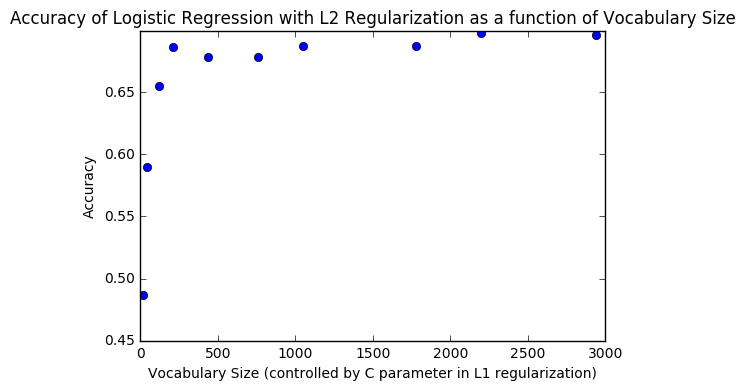

In [13]:
def P6():
# Keep this random seed here to make comparison easier.
    np.random.seed(0)
### STUDENT START ###    
# Use default CountVectorizer options
    vectorizer = CountVectorizer()
    doc_matrix_train = vectorizer.fit_transform(train_data)
    doc_matrix_dev = vectorizer.transform(dev_data)
    
# Logistic regression using L2 penalty with the default value of C (1.0)
    model = LogisticRegression(penalty='l2', C=1.0)
    model.fit(doc_matrix_train, train_labels)
    print ("Nonzero Weights with L2 Regularization: {}.".format(np.count_nonzero(model.coef_)))
    print ("Accuracy: {}.".format(model.score(doc_matrix_dev, dev_labels)))

# Logistic regression using L1 penalty with the default value of C (1.0)
    model = LogisticRegression(penalty='l1', C=1.0)
    model.fit(doc_matrix_train, train_labels)
    print ("Nonzero Weights with L1 Regularization: {}.".format(np.count_nonzero(model.coef_)))
    print ("  Accuracy: {}.".format(model.score(doc_matrix_dev, dev_labels)))
    
# Retrain using features with nonzero weights
    # [1] gives the index of the features ([0]: index of class), np.unique yields nonrepeating indices
    nonzero_features = np.unique(np.nonzero(model.coef_)[1])
    # Extract vocab with nonzero features
    nonzero_vocab = np.array(vectorizer.get_feature_names())[nonzero_features]
    
# Vectorize with new vocab
    vectorizer = CountVectorizer(vocabulary=nonzero_vocab)
    doc_matrix_train = vectorizer.fit_transform(train_data)
    doc_matrix_dev = vectorizer.transform(dev_data)

# Fit L2 model with the reduced set of features
    model = LogisticRegression(penalty='l2', C=1.0)
    model.fit(doc_matrix_train, train_labels)
    print ("Nonzero Weights with L2 Regularization and reduced Vocab: {}.".format(np.count_nonzero(model.coef_)))
    print ("Accuracy {}.".format(model.score(doc_matrix_dev, dev_labels)))
    
# Initialize C's and empty arrays for vocab_size and accuracy
    Cs = [0.01, 0.02, 0.05, 0.1, 0.25, 0.5, 1, 3, 5, 10]
    vocab_size = []
    accuracy = []
    
# Iterate through different C's
    for val in Cs:
    # Vectorize with standard vocab
        vectorizer = CountVectorizer()
        doc_matrix_train = vectorizer.fit_transform(train_data)
    # Fit a L1 model with C value and tol=0.01 to ensure convergence. Lower C value prunes more features.
        model = LogisticRegression(penalty='l1', C=val, tol=0.01)
        model.fit(doc_matrix_train, train_labels)
    # Obtain features with nonzero weights
        nonzero_features = np.unique(np.nonzero(model.coef_)[1])
        nonzero_vocab = np.array(vectorizer.get_feature_names())[nonzero_features]
        vocab_size.append(len(nonzero_vocab))
    # Vectorize with new vocab
        vectorizer = CountVectorizer(vocabulary=nonzero_vocab)
        doc_matrix_train = vectorizer.fit_transform(train_data)
        doc_matrix_dev = vectorizer.transform(dev_data)
    # Fit L2 model with default C=1.0
        model = LogisticRegression(penalty='l2', C=1.0, tol=0.01)
        model.fit(doc_matrix_train, train_labels)
        accuracy.append(model.score(doc_matrix_dev, dev_labels))
    
# Create plot
    plt.plot(vocab_size, accuracy, 'bo')
    plt.xlabel("Vocabulary Size (controlled by C parameter in L1 regularization)")
    plt.ylabel("Accuracy")
    plt.title("Accuracy of Logistic Regression with L2 Regularization as a function of Vocabulary Size")
    
    ### STUDENT END ###
    
P6()

(7) Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

In [15]:
def P7():
    
### STUDENT START ###

    # TF-IDF Vectorize
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_data)
    X_dev = vectorizer.transform(dev_data)

    # Train model and get predicted probabilities
    logreg = LogisticRegression(penalty='l2', C=100)
    logreg.fit(X_train, train_labels)
    predicted = logreg.predict(X_dev)
    pred_prob = logreg.predict_proba(X_dev)

    # Report documents with biggest R
    R = [ max(x) / x[dev_labels[i]] for i,x in enumerate(pred_prob) ]
    documents = np.argsort(-np.array(R))[:3]

    for d in documents:
        print('\n Document #{}'.format(d))
        print(' ' + '='*len('Document #{}'.format(d)))
        print(' + Predicted topic:', pretty_categories[predicted[d]])
        print(' + Actual topic:',pretty_categories[dev_labels[d]])

        print('\n', dev_data[d], '\n')

## STUDENT END ###

P7()


 Document #215
 + Predicted topic: Graphics
 + Actual topic: Religion

 I am pleased to announce that a *revised version* of _The Easy-to-Read Book
of Mormon_ (former title: _Mormon's Book_) by Lynn Matthews Anderson is now
available through anonymous ftp (see information below). In addition to the
change in title, the revised ETR BOM has been shortened by several pages
(eliminating many extraneous "that's" and "of's"), and many (minor) errors
have been corrected. This release includes a simplified Joseph Smith Story,
testimonies of the three and eight witnesses, and a "Words-to-Know"
glossary.

As with the previous announcement, readers are reminded that this is a
not-for-profit endeavor. This is a copyrighted work, but people are welcome
to make *verbatim* copies for personal use. People can recuperate the
actual costs of printing (paper, copy center charges), but may not charge
anything for their time in making copies, or in any way realize a profit
from the use of this book. See t

ANSWER:

(8) EXTRA CREDIT

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.